# Introduction

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:
---- add shit

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

In [203]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Loading the Data

In [204]:
species = pd.read_csv('Species_info.csv', encoding='utf-8')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [205]:
observations = pd.read_csv('Observations.csv', encoding='utf-8')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


#### Data Characteristics

In [206]:
species.shape

(5824, 4)

In [207]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [208]:
observations.shape

(23296, 3)

In [209]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


## Exploring the Data

#### Species

In [210]:
print('number of species: {}'.format(species.scientific_name.nunique()))

number of species: 5541


In [211]:
print('number of categories: {}'.format(species.category.nunique()))
print('categories: {}'.format(species.category.unique()))

number of categories: 7
categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [212]:
species.category.value_counts()

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64

In [213]:
print('number of conservation status: {}'.format(species.conservation_status.nunique()))
print('unique conservation status: {}'.format(species.conservation_status.unique()))

number of conservation status: 4
unique conservation status: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [214]:
print('no conservation status: {}'.format(species.conservation_status.isna().sum()))

no conservation status: 5633


In [215]:
species.conservation_status.value_counts()

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64

#### Observations

In [216]:
print('number of parks: {}'.format(observations.park_name.nunique()))
print('parks: {}'.format(observations.park_name.unique()))

number of parks: 4
parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [217]:
print('number of observations: {}'.format(observations.observations.sum()))

number of observations: 3314739


## Data Cleaning

Replacing NaN values in conservation_status with "No Concern"

In [218]:
species.fillna('No Intervention', inplace=True)
species.conservation_status.value_counts()

No Intervention       5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64

In [219]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  5824 non-null   object
dtypes: object(4)
memory usage: 182.1+ KB


Handling duplicate data

In [220]:
species[species.duplicated(subset=['scientific_name'])]

,category,scientific_name,common_names,conservation_status
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,No Intervention
3019,Mammal,Odocoileus virginianus,"White-Tailed Deer, White-Tailed Deer",No Intervention
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",No Intervention
3025,Mammal,Lutra canadensis,River Otter,No Intervention
...,...,...,...,...
5619,Vascular Plant,Panicum rigidulum var. rigidulum,"Redtop Panicgrass, Redtop Panicum",No Intervention
5638,Vascular Plant,Setaria pumila,"Cattail Grass, Yellow Bristle Grass, Yellow Br...",No Intervention
5640,Vascular Plant,Vulpia bromoides,"Brome Fescue, Brome Six-Weeks Grass, Desert Fe...",No Intervention
5643,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",No Intervention


In [221]:
species[species.scientific_name == 'Cervus elaphus']

,category,scientific_name,common_names,conservation_status
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,No Intervention


In [222]:
species[species.scientific_name == "Puma concolor"]

,category,scientific_name,common_names,conservation_status
16,Mammal,Puma concolor,Panther (Mountain Lion),No Intervention
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",No Intervention
4451,Mammal,Puma concolor,Mountain Lion,No Intervention


In [223]:
species[species.scientific_name=="Rosa eglanteria"]

,category,scientific_name,common_names,conservation_status
2534,Vascular Plant,Rosa eglanteria,"Sweet Brier, Sweetbrier",No Intervention
5750,Vascular Plant,Rosa eglanteria,Sweetbriar Rose,No Intervention


In [224]:
species.drop_duplicates(subset='scientific_name', keep="last", inplace=True)
species.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   object
 1   scientific_name      5541 non-null   object
 2   common_names         5541 non-null   object
 3   conservation_status  5541 non-null   object
dtypes: object(4)
memory usage: 216.4+ KB


Handling duplicated observations

The same species could be found at different parks, so this is seeing if the same species is duplicated in a single park at a time. for ex: multiple entries for agrostis gigantea in yellowstone.


In [225]:
observations[observations.duplicated(subset=['scientific_name','park_name'])]


,scientific_name,park_name,observations
483,Agrostis gigantea,Yellowstone National Park,235
490,Agrostis mertensii,Yosemite National Park,128
945,Rumex crispus,Yellowstone National Park,255
1213,Dianthus barbatus,Bryce National Park,110
1259,Riparia riparia,Bryce National Park,91
...,...,...,...
23258,Microtus longicaudus,Yellowstone National Park,244
23259,Agrostis scabra,Bryce National Park,118
23267,Oxalis corniculata,Yosemite National Park,164
23273,Dactylis glomerata,Bryce National Park,89


In [226]:
observations[observations.scientific_name=="Agrostis gigantea"]

,scientific_name,park_name,observations
449,Agrostis gigantea,Yellowstone National Park,253
483,Agrostis gigantea,Yellowstone National Park,235
6824,Agrostis gigantea,Bryce National Park,104
7763,Agrostis gigantea,Great Smoky Mountains National Park,93
8676,Agrostis gigantea,Bryce National Park,116
11602,Agrostis gigantea,Great Smoky Mountains National Park,57
13907,Agrostis gigantea,Yosemite National Park,148
17535,Agrostis gigantea,Yosemite National Park,128


Combining the total observations for each scientific name and putting that value in the column: 'total_observations'

In [227]:
observations['total_observations'] = observations.groupby(['scientific_name', 'park_name'])['observations'].transform('sum')
observations.head()

,scientific_name,park_name,observations,total_observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68,68
1,Neovison vison,Great Smoky Mountains National Park,77,77
2,Prunus subcordata,Yosemite National Park,138,138
3,Abutilon theophrasti,Bryce National Park,84,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85,85


In [228]:
observations.drop_duplicates(subset=['scientific_name', 'park_name'], keep='last', inplace=True)
observations[observations.scientific_name=="Agrostis gigantea"]

,scientific_name,park_name,observations,total_observations
483,Agrostis gigantea,Yellowstone National Park,235,488
8676,Agrostis gigantea,Bryce National Park,116,220
11602,Agrostis gigantea,Great Smoky Mountains National Park,57,150
17535,Agrostis gigantea,Yosemite National Park,128,276


In [229]:
observations = observations[['scientific_name', 'park_name', 'total_observations']]
observations.head()



,scientific_name,park_name,total_observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


#### Making one dataframe out of the two

In [230]:
biodiversity = pd.merge(observations, species, left_on='scientific_name', right_on = 'scientific_name', how='left')
biodiversity.head()


,scientific_name,park_name,total_observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Intervention
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,No Intervention
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,No Intervention
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,No Intervention


In [231]:
biodiversity.shape

(22164, 6)

In [232]:
biodiversity.park_name.value_counts()

Great Smoky Mountains National Park    5541
Yosemite National Park                 5541
Bryce National Park                    5541
Yellowstone National Park              5541
Name: park_name, dtype: int64

In [233]:
biodiversity.category.value_counts()

Vascular Plant       17048
Bird                  1952
Nonvascular Plant     1332
Mammal                 704
Fish                   500
Amphibian              316
Reptile                312
Name: category, dtype: int64

In [234]:
biodiversity.conservation_status.value_counts()

No Intervention       21448
Species of Concern      604
Endangered               60
Threatened               40
In Recovery              12
Name: conservation_status, dtype: int64

## Analysis

Number of observations by category 

Text(0, 0.5, 'Number of Observations')

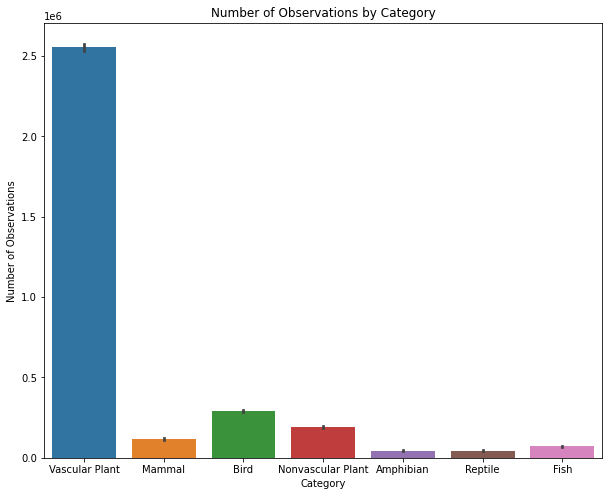

In [235]:
plt.figure(figsize=(10,8))
sns.color_palette("hls", 8)
sns.barplot(x=biodiversity['category'], y=biodiversity['total_observations'], estimator=np.sum)
plt.title('Number of Observations by Category')
plt.xlabel('Category')
plt.ylabel('Number of Observations')

Number of Observations by Category and Conservation Status

Text(0, 0.5, 'Number of Observations')

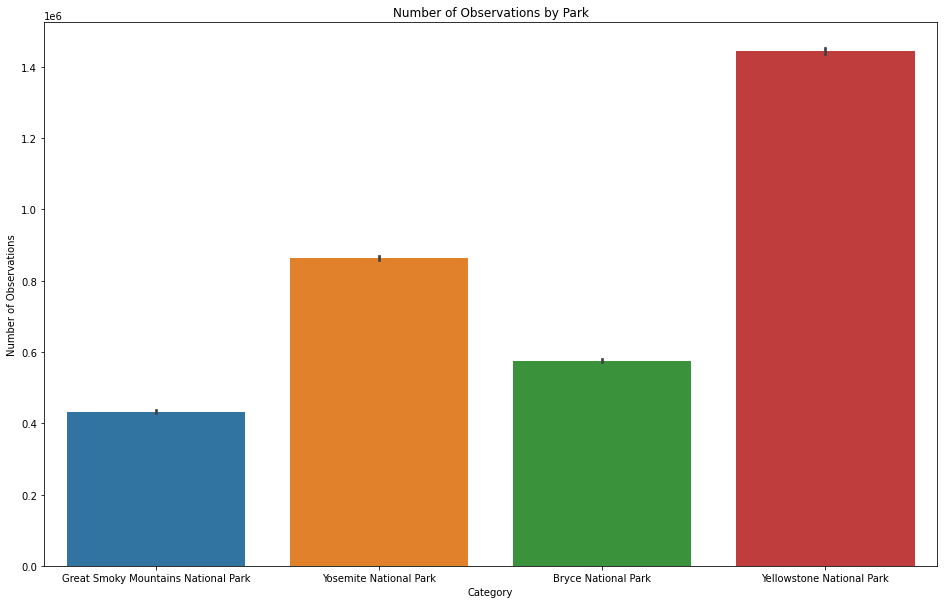

In [236]:
plt.figure(figsize=(16,10))
sns.color_palette("hls", 8)
sns.barplot(x=biodiversity['park_name'], y=biodiversity['total_observations'], estimator=np.sum)
plt.title('Number of Observations by Park')
plt.xlabel('Category')
plt.ylabel('Number of Observations')

Number of Observations by Category for each Conservation Status

Text(0, 0.5, 'Number of Observations')

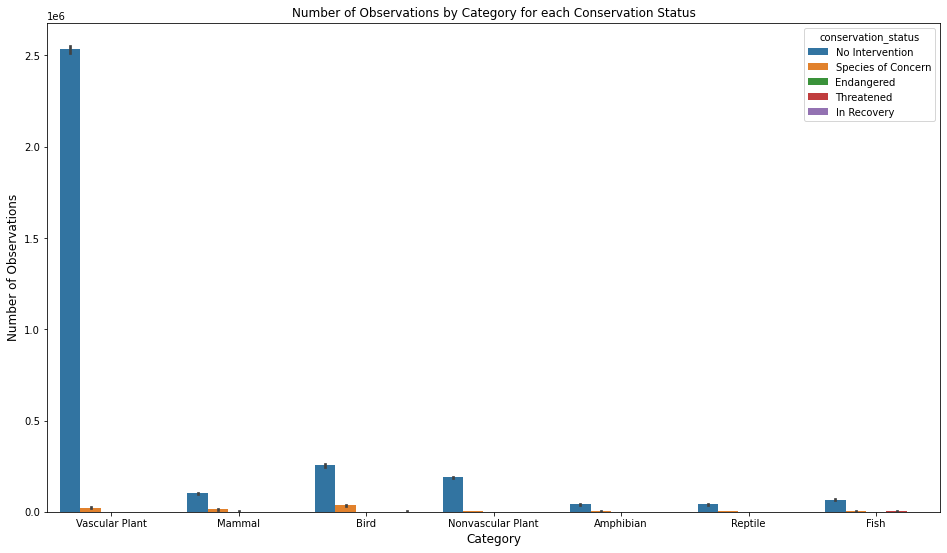

In [237]:
plt.figure(figsize=(16,9))
sns.color_palette("hls", 8)
sns.barplot(x=biodiversity['category'], y=biodiversity['total_observations'], hue=biodiversity['conservation_status'], estimator=np.sum)
plt.title('Number of Observations by Category for each Conservation Status')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Observations', fontsize=12)

Number of Observations by Park for each Category

Text(0, 0.5, 'Number of Observations')

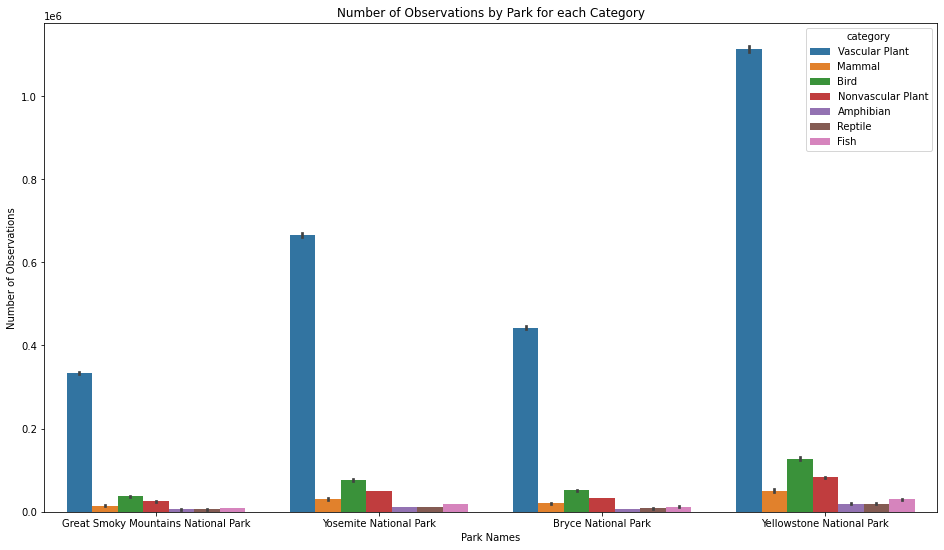

In [238]:
plt.figure(figsize=(16,9))
sns.color_palette("hls", 8)
sns.barplot(x=biodiversity['park_name'], y=biodiversity['total_observations'], hue=biodiversity['category'], estimator=np.sum)
plt.title('Number of Observations by Park for each Category')
plt.xlabel('Park Names')
plt.ylabel('Number of Observations')

Number of Observations by Category for each Park

Text(0, 0.5, 'Number of Observations')

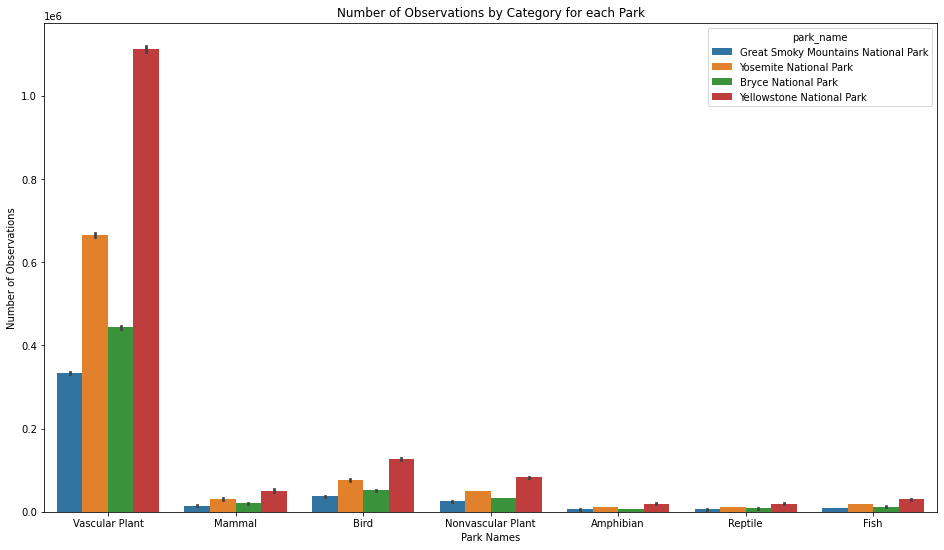

In [239]:
plt.figure(figsize=(16,9))
sns.color_palette("hls", 8)
sns.barplot(x=biodiversity['category'], y=biodiversity['total_observations'], hue=biodiversity['park_name'], estimator=np.sum)
plt.title('Number of Observations by Category for each Park')
plt.xlabel('Park Names')
plt.ylabel('Number of Observations')

#### Visualization of Distribution

Text(0.5, 1.0, 'Distribution of Conservation Status')

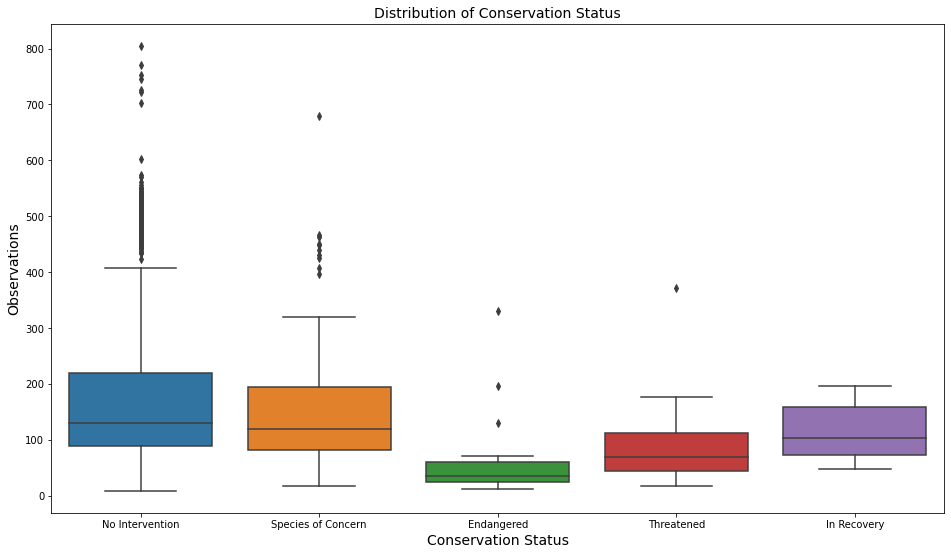

In [240]:
plt.figure(figsize=(16,9))
sns.color_palette("Set2")
sns.boxplot(x=biodiversity['conservation_status'], y = biodiversity['total_observations'])
plt.xlabel('Conservation Status', fontsize=14)
plt.ylabel('Observations', fontsize=14)
plt.title('Distribution of Conservation Status', fontsize=14)

Text(0.5, 1.0, 'Distribution of Conservation Status')

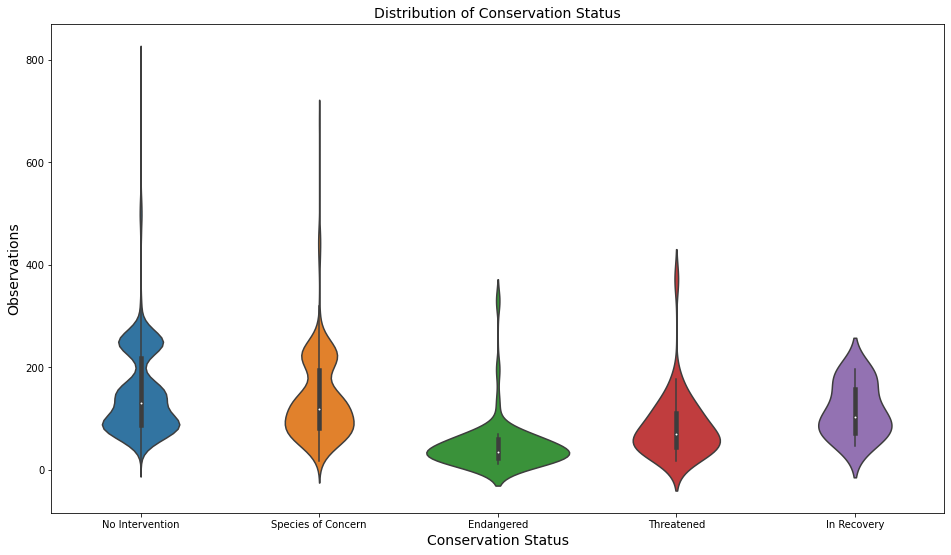

In [241]:
plt.figure(figsize=(16,9))
sns.color_palette("Set2")
sns.violinplot(x=biodiversity['conservation_status'], y = biodiversity['total_observations'])
plt.xlabel('Conservation Status', fontsize=14)
plt.ylabel('Observations', fontsize=14)
plt.title('Distribution of Conservation Status', fontsize=14)

Text(0.5, 1.0, 'Distribution of Category')

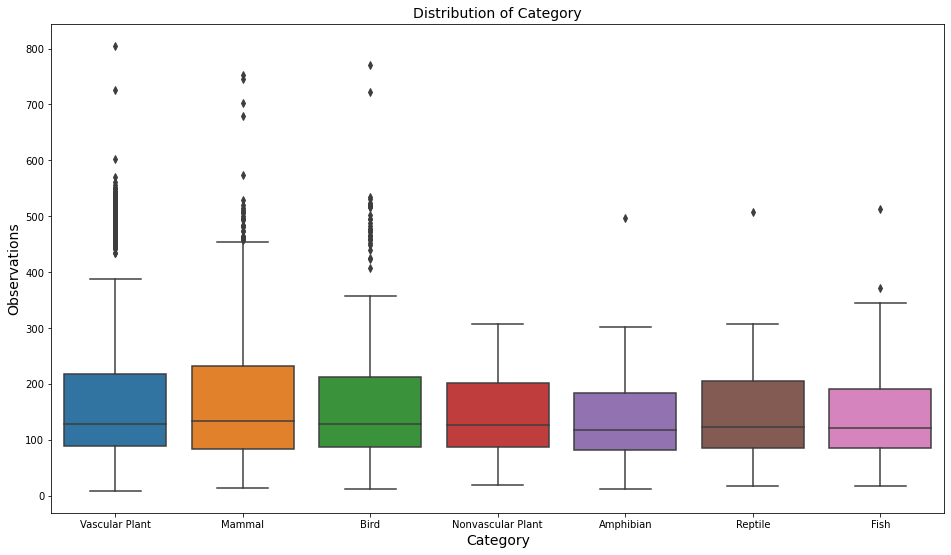

In [242]:
plt.figure(figsize=(16,9))
sns.color_palette("Set2")
sns.boxplot(x=biodiversity['category'], y = biodiversity['total_observations'])
plt.xlabel('Category', fontsize=14)
plt.ylabel('Observations', fontsize=14)
plt.title('Distribution of Category', fontsize=14)

Text(0.5, 1.0, 'Distribution of Category')

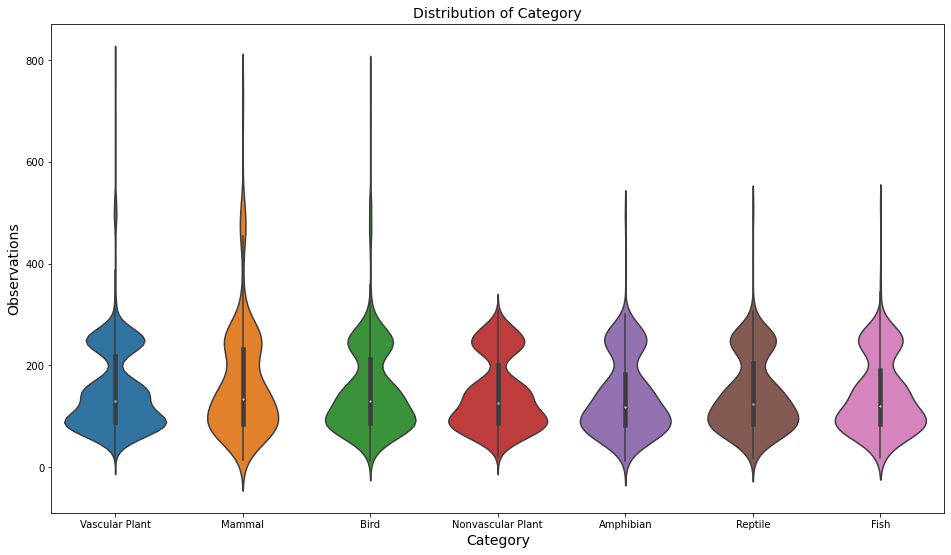

In [243]:
plt.figure(figsize=(16,9))
sns.color_palette("Set2")
sns.violinplot(x=biodiversity['category'], y = biodiversity['total_observations'])
plt.xlabel('Category', fontsize=14)
plt.ylabel('Observations', fontsize=14)
plt.title('Distribution of Category', fontsize=14)

Text(0.5, 1.0, 'Distribution of Biodiversity by Park')

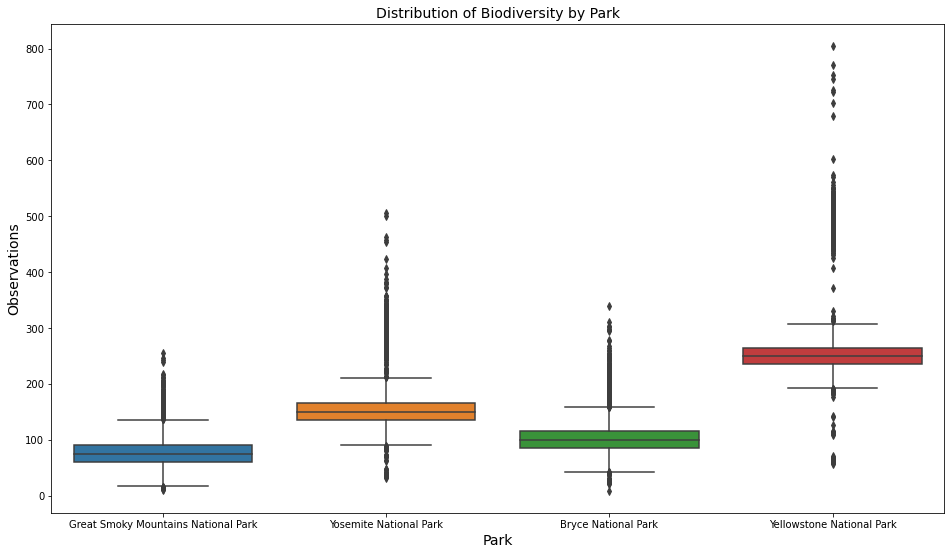

In [244]:
plt.figure(figsize=(16,9))
sns.color_palette("Set2")
sns.boxplot(x=biodiversity['park_name'], y = biodiversity['total_observations'])
plt.xlabel('Park', fontsize=14)
plt.ylabel('Observations', fontsize=14)
plt.title('Distribution of Biodiversity by Park', fontsize=14)

Text(0.5, 1.0, 'Distribution of Biodiversity by Park')

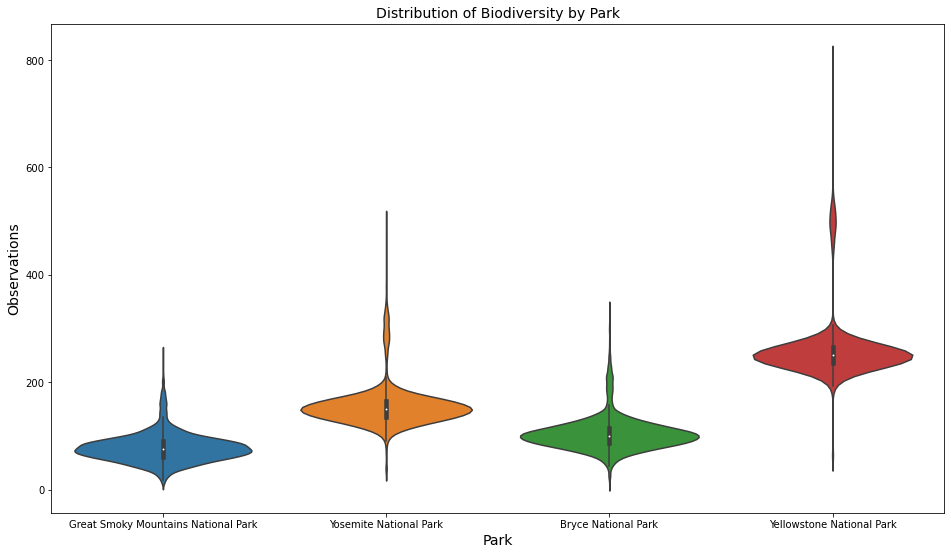

In [245]:
plt.figure(figsize=(16,9))
sns.color_palette("Set2")
sns.violinplot(x=biodiversity['park_name'], y = biodiversity['total_observations'])
plt.xlabel('Park', fontsize=14)
plt.ylabel('Observations', fontsize=14)
plt.title('Distribution of Biodiversity by Park', fontsize=14)

#### Conservation Status

In [246]:
biodiversity['is_protected'] = biodiversity.conservation_status != 'No Intervention'
biodiversity.head()

,scientific_name,park_name,total_observations,category,common_names,conservation_status,is_protected
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Intervention,False
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,No Intervention,False
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,No Intervention,False
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,No Intervention,False


In [247]:
under_protection = biodiversity[biodiversity['is_protected']].category.value_counts().reset_index()
under_protection

,index,category
0,Bird,300
1,Vascular Plant,184
2,Mammal,120
3,Fish,44
4,Amphibian,28
5,Reptile,20
6,Nonvascular Plant,20


In [248]:
under_protection = under_protection.rename(columns={'index':'category', 'category':'under_protection'})
under_protection

,category,under_protection
0,Bird,300
1,Vascular Plant,184
2,Mammal,120
3,Fish,44
4,Amphibian,28
5,Reptile,20
6,Nonvascular Plant,20


In [251]:
total_amount = biodiversity['category'].value_counts().reset_index().rename(columns={'index': 'category', 'category': 'total_amount'})
under_protection = under_protection.merge(total_amount)
under_protection

,category,under_protection,total_amount,percent_protected%
0,Bird,300,1952,15.37
1,Vascular Plant,184,17048,1.08
2,Mammal,120,704,17.05
3,Fish,44,500,8.80
4,Amphibian,28,316,8.86
5,Reptile,20,312,6.41
6,Nonvascular Plant,20,1332,1.50


In [252]:
under_protection['percent_protected%'] = round(100*(under_protection['under_protection'])/(under_protection['total_amount']),2)
under_protection

,category,under_protection,total_amount,percent_protected%
0,Bird,300,1952,15.37
1,Vascular Plant,184,17048,1.08
2,Mammal,120,704,17.05
3,Fish,44,500,8.80
4,Amphibian,28,316,8.86
5,Reptile,20,312,6.41
6,Nonvascular Plant,20,1332,1.50


Text(0.5, 1.0, 'Number of Species Under Protection by Category')

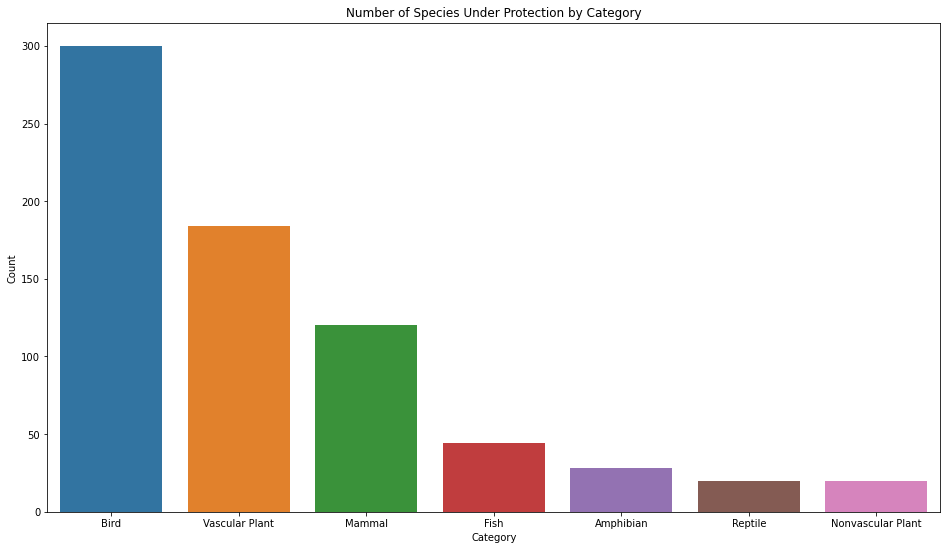

In [254]:
plt.figure(figsize=(16,9))
sns.barplot(x=under_protection['category'],y=under_protection['under_protection'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of Species Under Protection by Category')

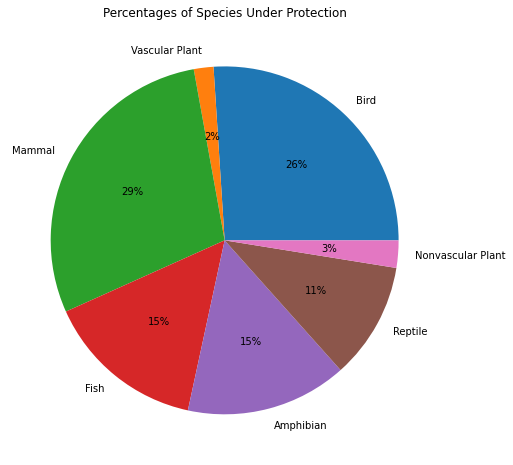

In [264]:
fig = plt.figure(figsize=(16,8))
plt.pie(under_protection['percent_protected%'], labels=under_protection['category'], autopct = '%0.0f%%')
plt.title('Percentages of Species Under Protection')
plt.show()

Text(0.5, 1.0, 'Distribution of categories by conservation status')

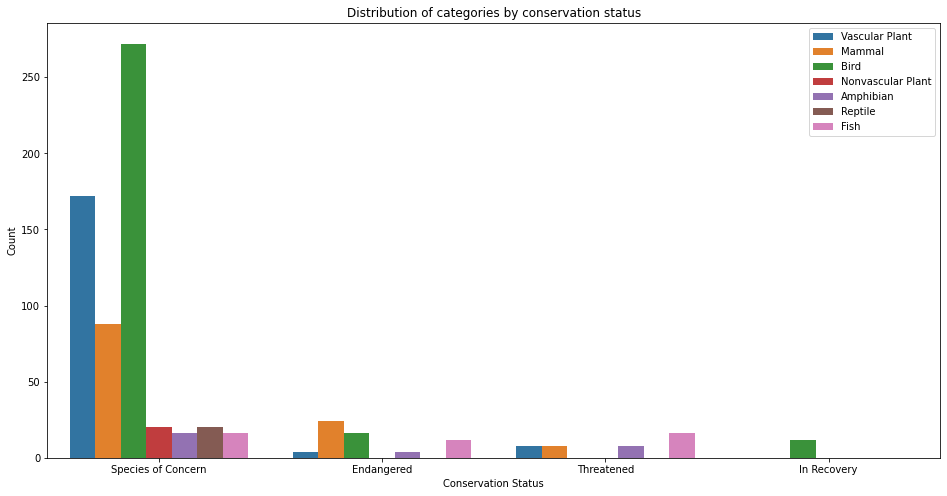

In [267]:
data_shown = ['Species of Concern', 'Endangered', 'Threatened', 'In Recovery']
fig = plt.figure(figsize=(16, 8))
sns.countplot(x='conservation_status', data=biodiversity, hue='category', order=data_shown)
plt.legend(loc='upper right')
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.title('Distribution of categories by conservation status')

Text(0.5, 1.0, 'Distribution of Conservation Status by Category')

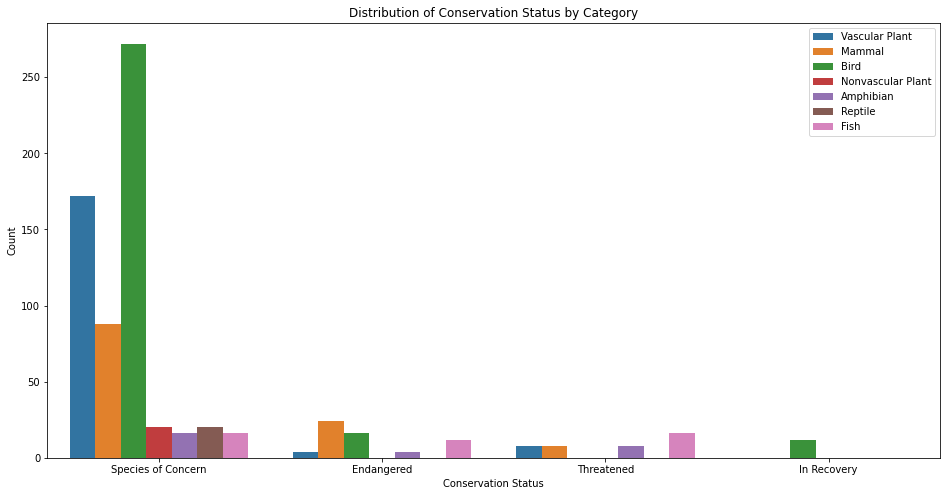

In [268]:
data_shown = ['Species of Concern', 'Endangered', 'Threatened', 'In Recovery']
fig = plt.figure(figsize=(16, 8))
sns.countplot(x='conservation_status', data=biodiversity, hue='category', order=data_shown)
plt.legend(loc='upper right')
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.title('Distribution of Conservation Status by Category')

## Conclusions

- Most species are not protected
- Mammals and Birds are more likely to be protected species.
- While vascular plants were highly represented in species of concern, the overwhelming majority of them are not protected. More vascular plants were protected as opposed to nonvascular plants.
- Yellowstone had the most amount of species, especially vascular plants
- Species of Concern was the level of protection that was represented the most (as opposed to endangered, threatened, or in recovery)
